In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [76]:
data = pd.read_csv('googleplaystore.csv', sep = ",")

In [77]:
data.shape

(10841, 13)

In [78]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Как мы можем видеть, все значения кроме рейтинга являются объектами, хотя не должны (из-за миллионов в виде буквы М, запятых, разделяющих тысячи и плюсов в загрузках), что мы должны преобразовать.

In [79]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [80]:
for i in range(len(data['Reviews'])):
    if data['Reviews'][i][-1] == 'M':
        print(data['Reviews'][i])
        data['Reviews'][i] = str(int(float(data['Reviews'][i][0:-1])) * 1000000)
        print(data['Reviews'][i])

3.0M
3000000


<ipython-input-80-f4e9b22d392a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Reviews'][i] = str(int(float(data['Reviews'][i][0:-1])) * 1000000)


In [81]:
data['Reviews'] = data['Reviews'].astype(str).astype(int)

In [82]:
for i in range(len(data['Installs'])):
    if(data['Installs'][i] == 'Free'):
        data['Installs'][i] = 0
        continue
    data['Installs'][i] = data['Installs'][i].replace(",", "")
    data['Installs'][i] = data['Installs'][i].replace("+", "")            
    data['Installs'][i] = str(int(float(data['Installs'][i])))

<ipython-input-82-9c6f0fc030bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Installs'][i] = data['Installs'][i].replace(",", "")
<ipython-input-82-9c6f0fc030bc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Installs'][i] = data['Installs'][i].replace("+", "")
<ipython-input-82-9c6f0fc030bc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Installs'][i] = str(int(float(data['Installs'][i])))
<ipython-input-82-9

In [83]:
data['Installs'] = data['Installs'].astype(str).astype(int)

In [84]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [85]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [86]:
data.describe()

,Rating,Reviews,Installs
count,9367.000000,1.084100e+04,1.084100e+04
mean,4.193338,4.443887e+05,1.546291e+07
std,0.537431,2.927728e+06,8.502557e+07
min,1.000000,0.000000e+00,0.000000e+00
25%,4.000000,3.800000e+01,1.000000e+03
50%,4.300000,2.094000e+03,1.000000e+05
75%,4.500000,5.479800e+04,5.000000e+06
max,19.000000,7.815831e+07,1.000000e+09


Как мы видим теперь основные значения, а именно ревью и загрузки в правильном виде, а значит можем перейти к корреляционному анализу.

<AxesSubplot:xlabel='Rating', ylabel='Installs'>

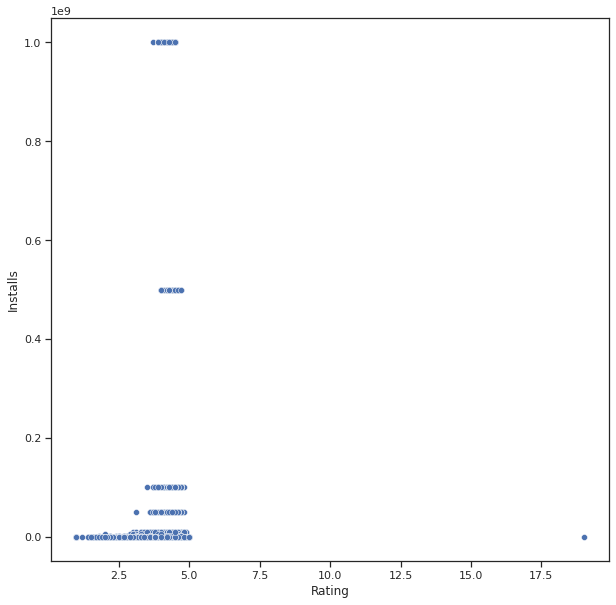

In [87]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Rating', y='Installs', data=data)

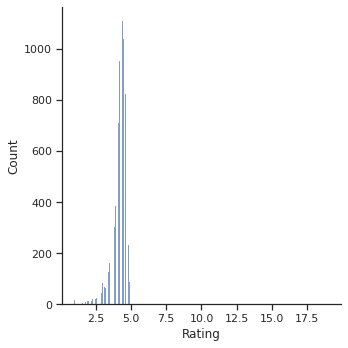

In [88]:
sns.displot(data['Rating'])

In [89]:
data.corr()

,Rating,Reviews,Installs
Rating,1.000000,0.067645,0.048652
Reviews,0.067645,1.000000,0.643084
Installs,0.048652,0.643084,1.000000


<AxesSubplot:>

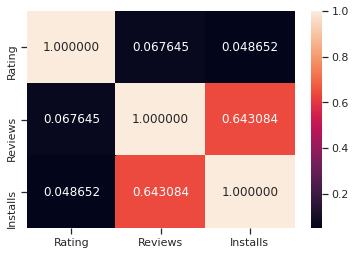

In [90]:
sns.heatmap(data.corr(), annot = True, fmt = '.6f')

Сильнее всего отзывы коррелируют с количеством установок, при этом рейтинг не коррелирует практически ни с чем.

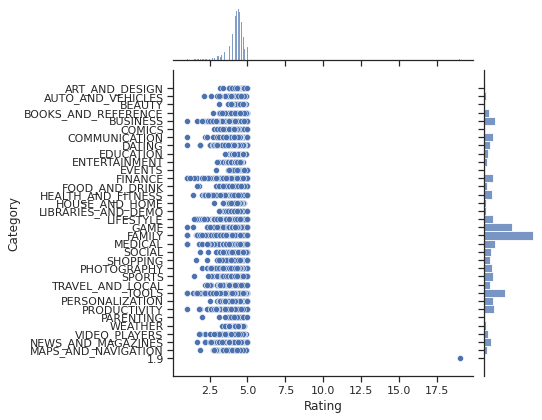

In [91]:
sns.jointplot(data=data, x='Rating', y='Category')

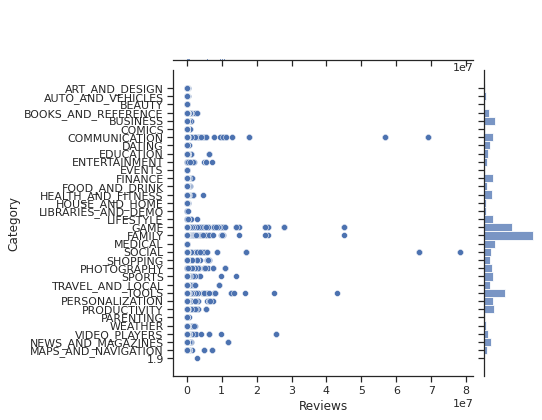

In [92]:
sns.jointplot(data=data, x='Reviews', y='Category')